# Visa Analysis Project

### 1) Problem statement.

- OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.
- As in last year, the count of employees was huge, so OFLC needs Machine Learning models to shortlist visa applicants based on their previous data.

**In this project, we are going to use the data given to build a Classification model:**

- This model is to check if Visa gets approved or not based on the given dataset.
- This can be used to recommend a suitable profile for the applicants for whom the visa should be certified or denied based on certain criteria which influences the decision.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

- **case_id**: ID of each visa application
- **continent**: Information of the continent of the employee
- **education_of_employee**: Information of the employee's education level
- **has_job_experience**: Does the employee have any job experience? (Y = Yes, N = No)
- **requires_job_training**: Does the employee require any job training? (Y = Yes, N = No)
- **no_of_employees**: Number of employees in the employer's company
- **yr_of_estab**: Year in which the employer's company was established
- **region_of_employment**: Information on the foreign worker's intended region of employment in the US
- **prevailing_wage**: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar services in the same area of employment.
- **unit_of_wage**: Unit of prevailing wage (e.g., Hourly, Weekly, Monthly, Yearly)
- **full_time_position**: Is the position full-time? (Y = Full Time, N = Part Time)
- **case_status**: Flag indicating if the Visa was certified or denied  (TARGET COLUMN WHICH NEEDS TO BE PREDICTED)


In [3]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# Ignore warning messages for a cleaner output
warnings.filterwarnings("ignore")

# Ensuring inline plotting in Jupyter Notebook
%matplotlib inline

# Loading the dataset and displaying the first 10 rows
df = pd.read_csv("visadataset.csv")
df.head(10)


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [4]:
df.shape

(25480, 12)

In [5]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [7]:
df.dtypes # object - string val:
# It’s okay to keep yr_of_estab as an integer unless you have specific time-based analysis requirements (like calculating the company’s age). For machine learning purposes, using it as a numeric feature should be effective.

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

### Check Null Values

In [9]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [10]:
!pip install missingno


<Axes: >

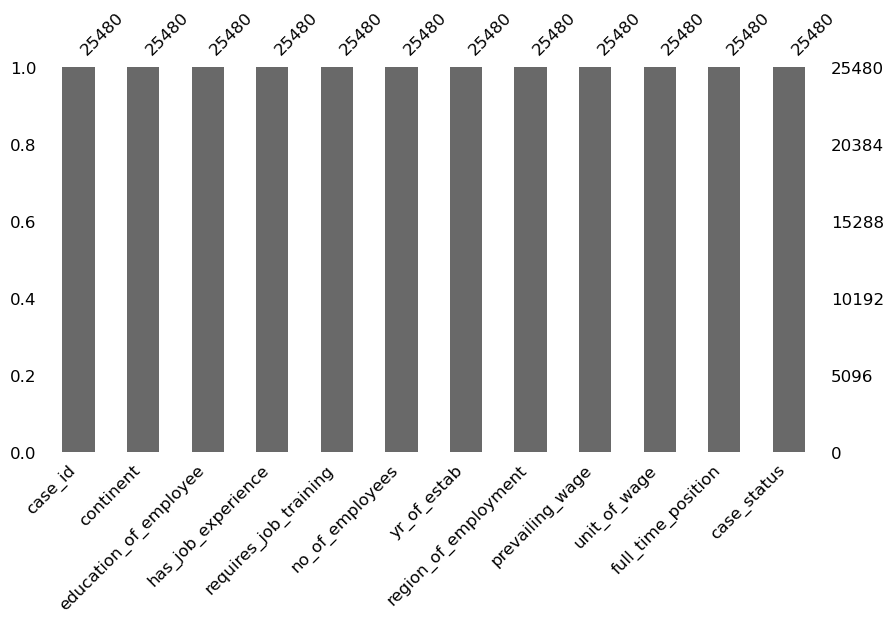

In [11]:
import missingno  # Importing the missingno library for visualizing missing data
missingno.bar(df, figsize=(10, 5), fontsize=12)  # Creating a bar plot of missing values with specified figure and font sizes


In [12]:
df.describe() # shows only Numerical(int,float) Values

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


 # Exploring data in detail

In [14]:
df.head() # as data has both numerical and categorical features so we can create 2 separate variables for it

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [15]:
# Selecting numeric features from the DataFrame
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']  #'o' means object/string dtype

# Selecting categorical features from the DataFrame
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


In [16]:
numeric_features # print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))



['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [17]:
categorical_features # print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [18]:
df['case_id'].value_counts()

case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64

In [19]:
df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [20]:
df['region_of_employment'].value_counts()

region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64

In [21]:
df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

In [22]:
df['education_of_employee'].value_counts()

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

- An employee who completed high school, went on to college, and graduated with a Bachelor's degree would be classified under "Bachelor's," not "High School."
- Those with "High School" as their highest level may not have pursued further education.
- education_of_employee
- Bachelor's     40.164835
- Master's       37.810047
- High School    13.422292
- Doctorate       8.602826

### Proportion (%) of count data on categorical columns

In [25]:

for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)  # Display percentage of each category in the column
    print('----------------------------')


case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
----------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
----------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
----------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
----------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
----------------------------
region_of_employment
Northeast

- continent
- Asia             66.173469
- Europe           14.646782
- North America    12.919937
- South America     3.343799
- Africa            2.162480
- Oceania           0.753532
- Name: proportion, dtype: float64



**Insights**

- **case_id** has unique values for each row, which can be dropped as it is of no importance.
- **continent** column is highly biased towards Asia, hence we can combine other categories to form a single category(others), class imbalance and can lead to problems in model performance and fairness.

- **unit_of_wage** seems to be an important column as most of them are yearly contracts.


# Univariate Analysis (single features)


- **Numerical Features**

In [29]:
numeric_features

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

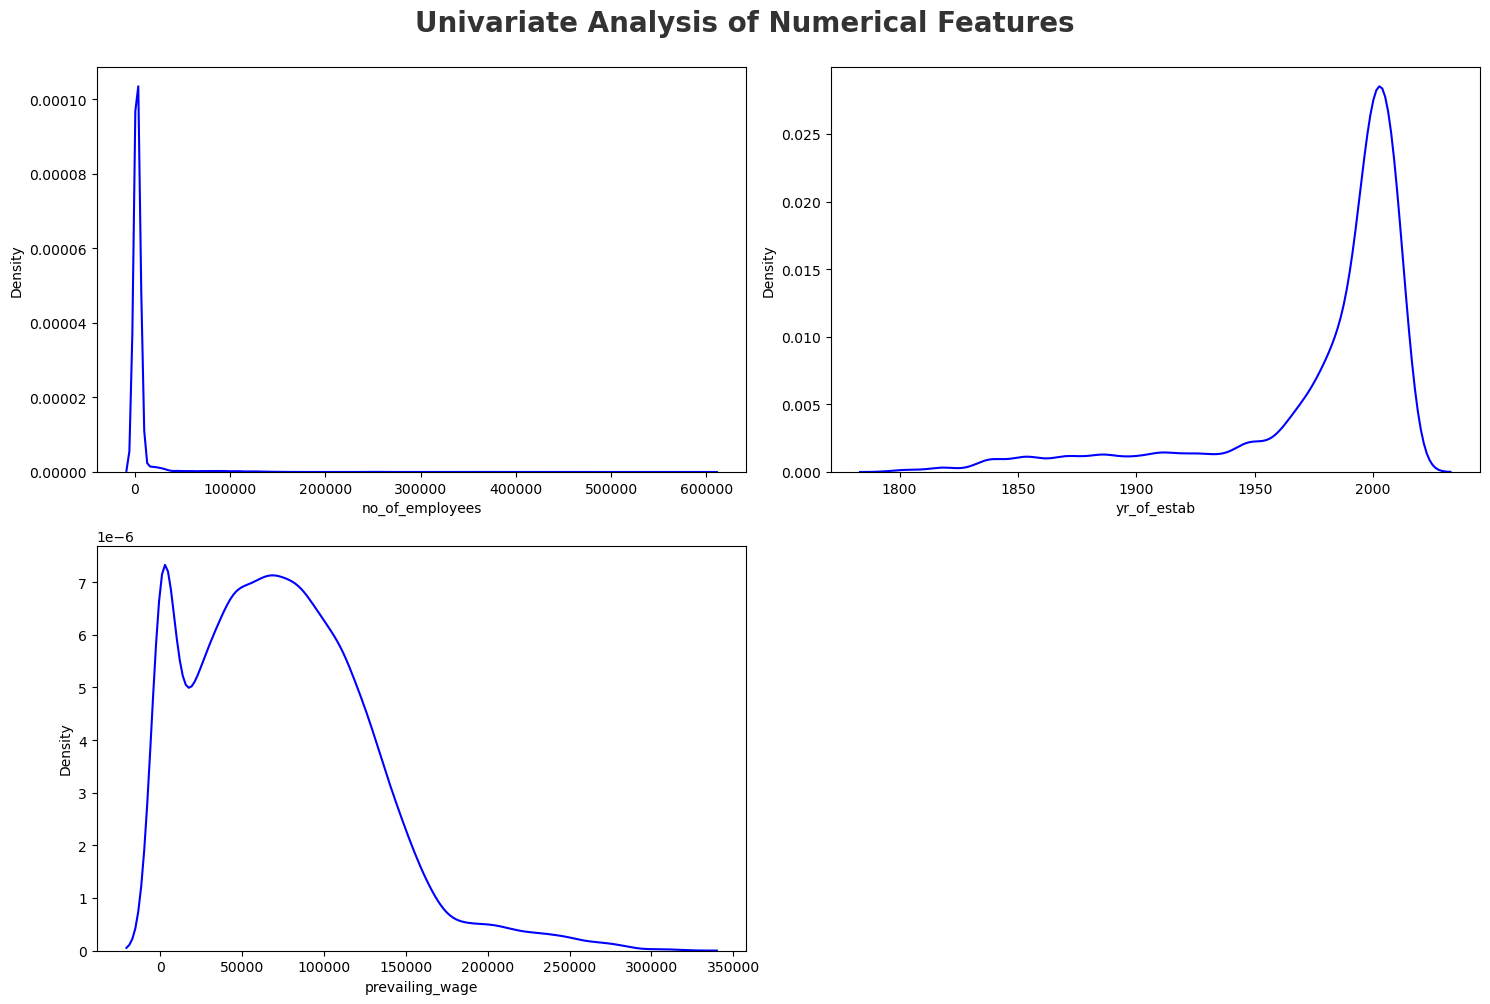

In [30]:
# Set up the figure size
plt.figure(figsize=(15, 10))

# Set the main title for the figure
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

# Loop through each numerical feature and plot it
for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i + 1)  # Create a subplot (2 rows, 2 columns, current position)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')  # Kernel Density Estimate plot
    plt.xlabel(numeric_features[i])  # Set x-axis label for each subplot

# Adjust layout to prevent overlap
plt.tight_layout()


**Overall Observations:**
1. Right-Skewness: Both no_of_employees and prevailing_wage show right-skewed distributions, indicating that higher values are much less common.

2. Recent Company Establishment: The yr_of_estab plot shows that most companies are relatively new, with a high concentration of establishment years in the latter half of the 20th century and beyond.

3. Potential Outliers: The extreme values in no_of_employees and prevailing_wage may need to be handled as outliers if they affect model performance.

- **Categorical Features**

In [33]:
categorical_features

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

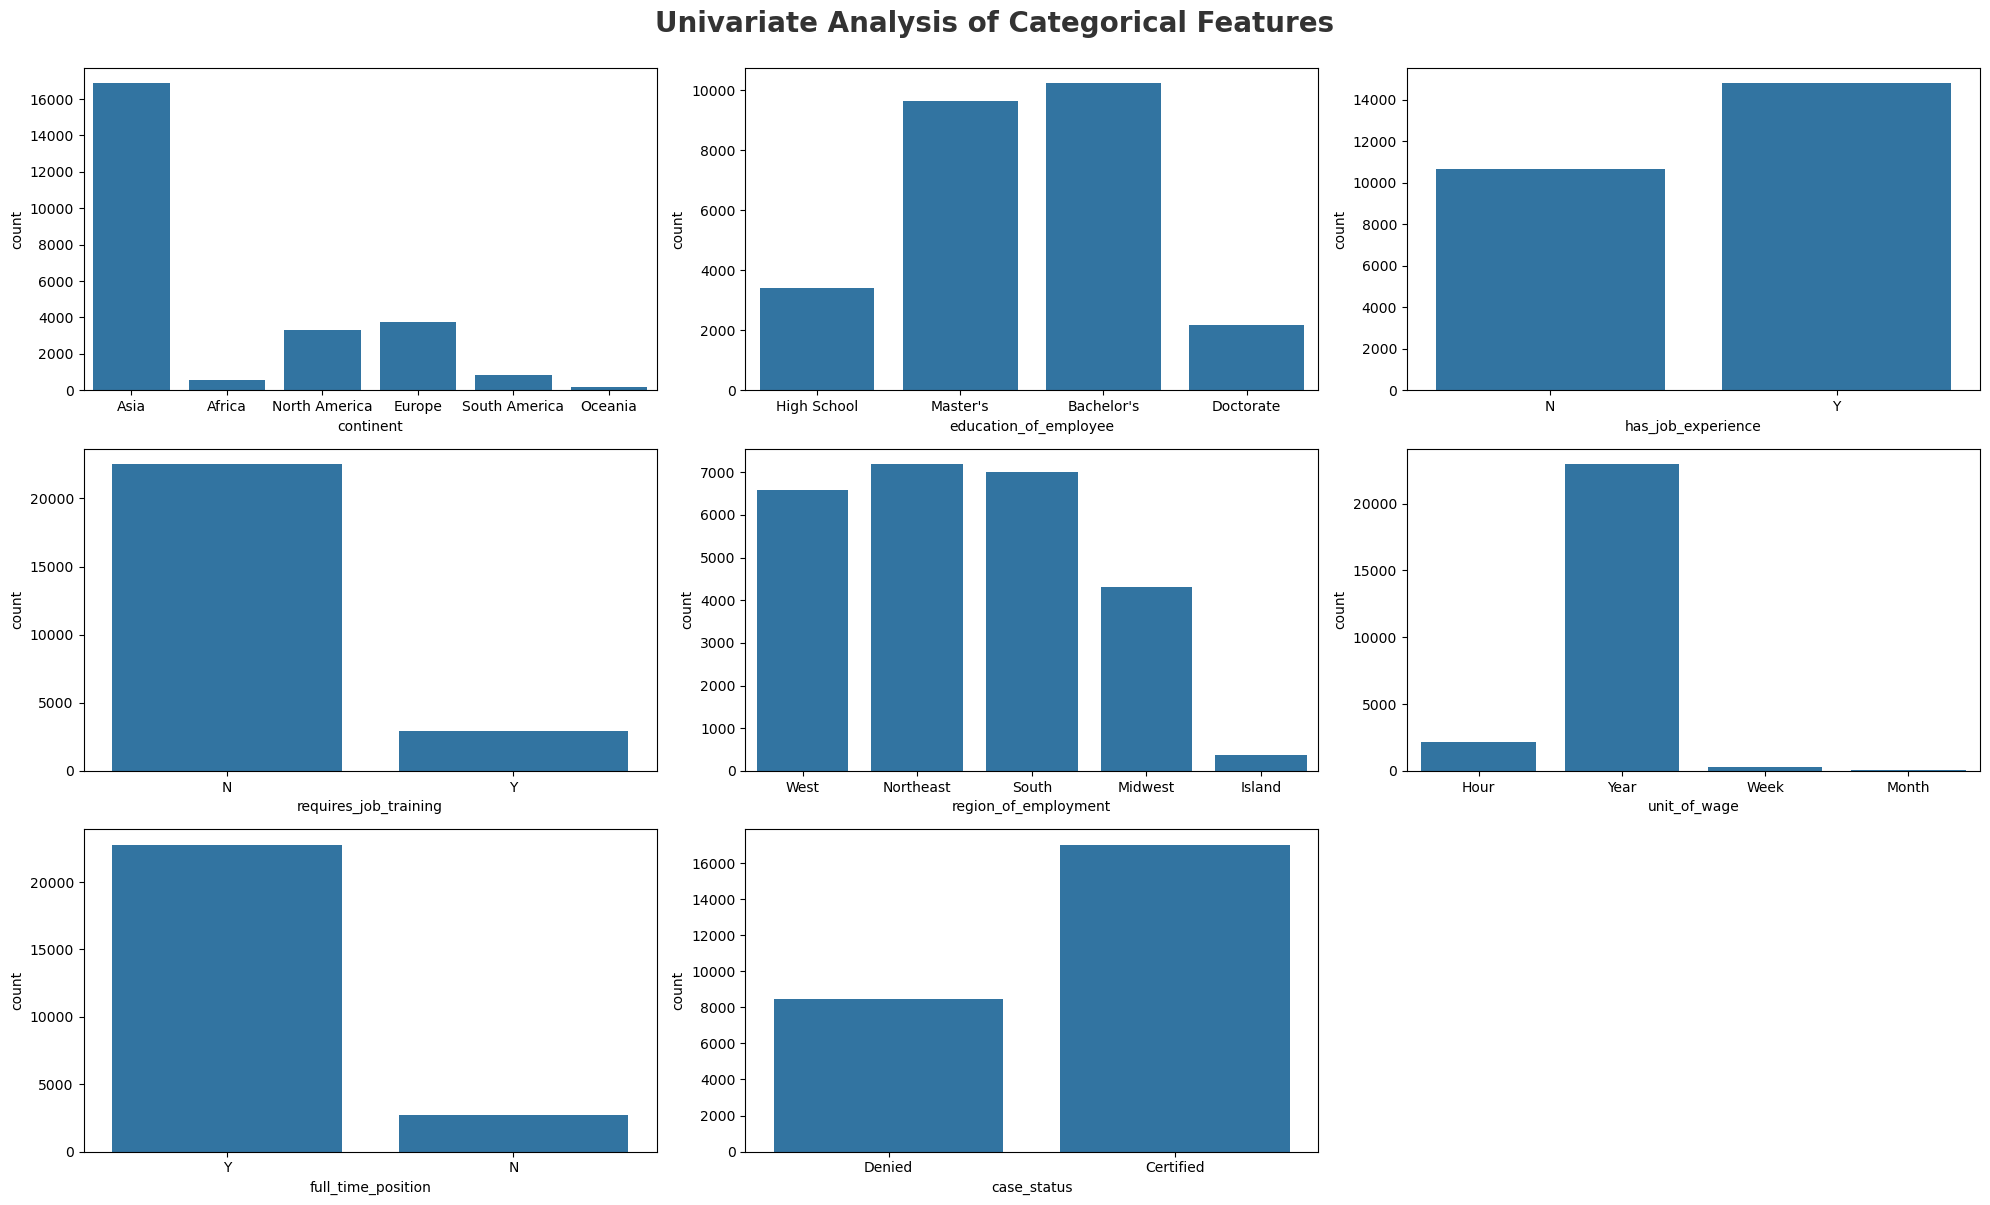

In [34]:

#Kernel Density Estimate (KDE) plots are only meaningful for continuous numerical data and not for categorical data. 
#sns.kdeplot are only meaningful for categorical  data 

# Remove 'case_id' from categorical columns, as it is likely unique and not useful for analysis
categorical_features.remove('case_id')

# Set up the figure size
plt.figure(figsize=(20, 12))

# Set the main title for the figure
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

# Loop through each categorical feature and plot it
for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i + 1)  # Create a subplot grid, adjust size based on the number of features
    sns.countplot(x=df[categorical_features[i]])  # Use countplot for categorical data
    plt.xlabel(categorical_features[i])  # Set x-axis label for each subplot

# Adjust layout to prevent overlap
plt.tight_layout()


- 4 features continent , requires_job_training , full_time_position , unit_of_wage seems one data is dominating (IMBALANCED DATA)

# Multivariate Analysis (many features)


- Discrete Features: Numeric features with 25 or fewer unique values are considered discrete.
- Continuous Features: Numeric features with more than 25 unique values are considered continuous.
- Discrete data is countable while continuous — measurable. , how many cats , heads in die etc
- Continuous data include weight, height, length, time, and temperature.
- The threshold of 25 unique values is an arbitrary choice but commonly used in data analysis.
- bar plots for discrete features, histograms or KDE plots for continuous features)

In [38]:
# Separate discrete and continuous numerical features
discrete_features = [feature for feature in numeric_features if len(df[feature].unique()) <= 25]
continuous_features = [feature for feature in numeric_features if len(df[feature].unique()) > 25]

# Print the counts and names of discrete and continuous features
print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous features : {}'.format(len(continuous_features), continuous_features))


We have 0 discrete features : []

We have 3 continuous features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


# Multicollinearity

Calculate the correlation matrix for the continuous features and look for pairs of features with high correlation coefficients (typically above 0.8 or 0.9).

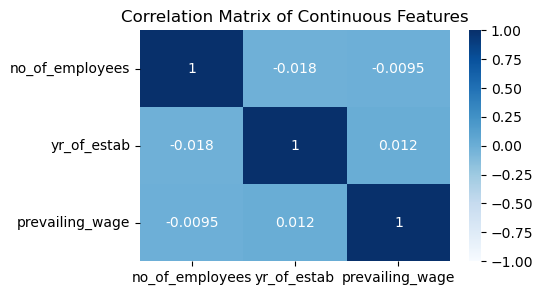

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for continuous features
corr_matrix = df[continuous_features].corr()

# Plot the heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Continuous Features')
plt.show()


No Multicollinearity Detected in continous numerical features:

Since all the off-diagonal values are close to 0, there is no significant correlation between these continuous features.
This implies that there is no multicollinearity issue among these continuous features, which

Multicollinearity Detection in categorical features done by Chi-Squared test (null and alternate hypothesis)

1. One-Hot Encoding and Variance Inflation Factor (VIF)
Convert categorical variables to dummy (one-hot encoded) variables.
Calculate the Variance Inflation Factor (VIF) for each dummy variable to identify multicollinearity.
VIF values above 5–10 indicate potential multicollinearity.

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

#### Assuming `df` is the DataFrame containing categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)  # One-hot encode categorical variables

#### Calculate VIF for each dummy variable
vif_data = pd.DataFrame()
vif_data['Feature'] = df_encoded.columns
vif_data['VIF'] = [variance_inflation_factor(df_encoded.values, i) for i in range(df_encoded.shape[1])]

print(vif_data)


2.  Chi-Square Test for Independence
For pairs of categorical variables, you can perform a Chi-square test of independence to see if there is a statistically significant association between them.
A significant result (p-value < 0.05) indicates that the variables are likely dependent, which might lead to multicollinearity.

from scipy.stats import chi2_contingency

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            print(f'Chi-square test between {col1} and {col2}: p-value = {p}')



In [44]:
from scipy.stats import chi2_contingency

# List to store the results of the chi-square test
chi2_test = []

# Loop through each categorical feature
for feature in categorical_features:
    # Perform chi-square test between 'case_status' and the feature
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')  # Significant association
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')  # No significant association

# Create a DataFrame to display the results
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']

# Display the result
result


,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


Fail to Reject Null Hypothesis: Indicates no significant association between the feature and case_status. In this case, requires_job_training did not show a significant relationship with case_status. This implies that the distribution of case_status does not change significantly based on requires_job_training.

### Check distribution of Numerical Features (continuous_features)

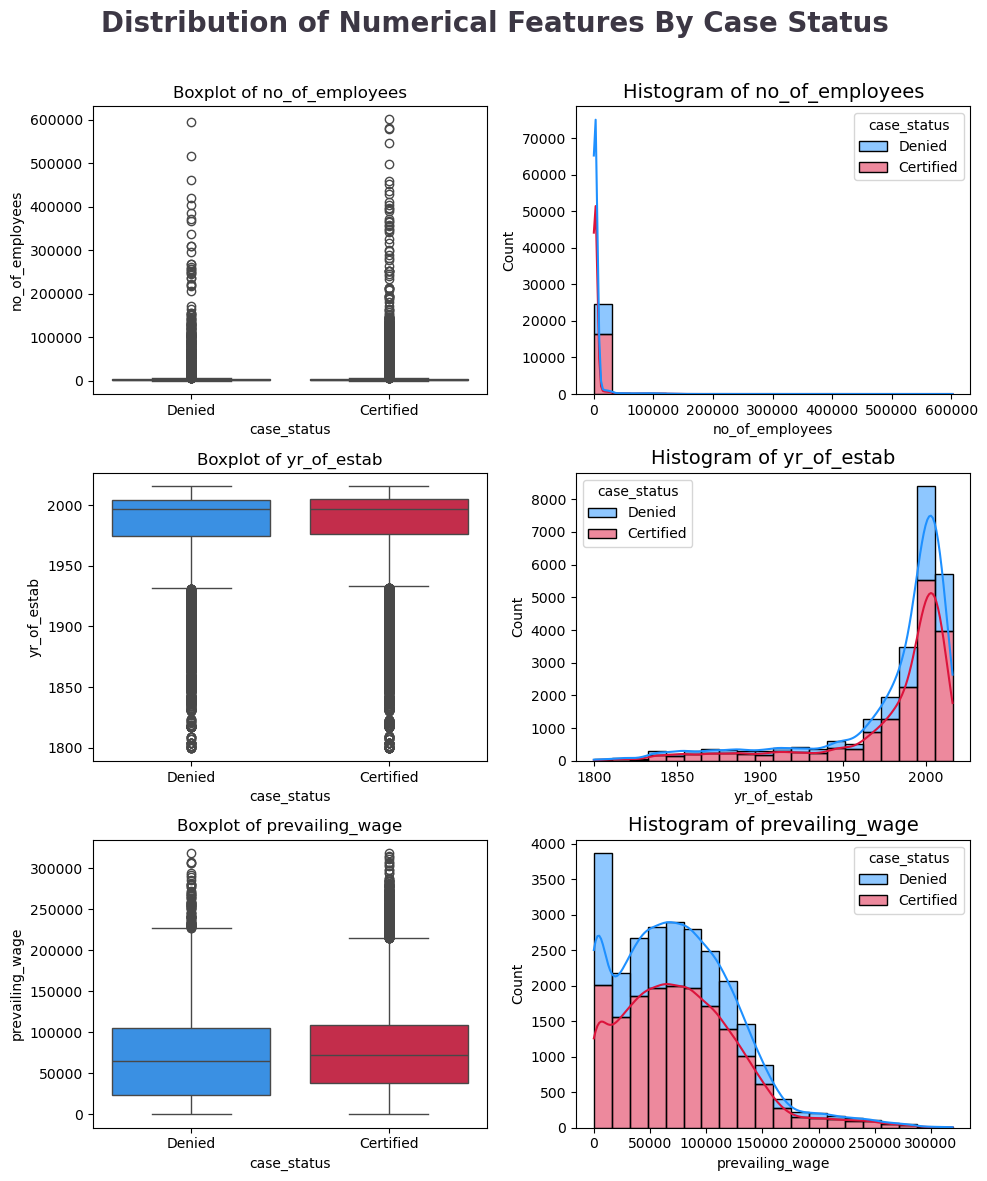

In [47]:
clr1 = ["#1E90FF", "#DC143C"]  # Color palette for the plots
fig, ax = plt.subplots(3, 2, figsize=(10, 12))  # Create subplots with a grid of 3 rows and 2 columns
fig.suptitle('Distribution of Numerical Features By Case Status', color="#3C3744",
             fontsize=20, fontweight='bold', ha='center')  # Title for the entire figure

# Loop through each continuous feature
for i, col in enumerate(continuous_features):
    # Boxplot for each feature by 'case_status'
    sns.boxplot(data=df, x='case_status', y=col, palette=clr1, ax=ax[i, 0])
    ax[i, 0].set_title(f'Boxplot of {col}', fontsize=12)  # Title for each boxplot

    # Histogram for each feature by 'case_status' with KDE (Kernel Density Estimate)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True,
                 multiple='stack', palette=clr1, ax=ax[i, 1])
    ax[i, 1].set_title(f'Histogram of {col}', fontsize=14)  # Title for each histogram

plt.tight_layout()  # Adjust layout to prevent overlap
fig.subplots_adjust(top=0.90)  # Adjust the top spacing to fit the figure title


Insights for Each Variable
1. no_of_employees

Box Plot:
Both "Denied" and "Certified" categories have a high concentration of data points close to zero, indicating that most companies sponsoring visas are small in size.
There are numerous outliers for both "Denied" and "Certified" applications, with some companies having very large numbers of employees.

Histogram:
The majority of applications (both denied and certified) are clustered at smaller employee counts.
There’s a clear skew toward lower values, with fewer large companies applying.
Insight: High employee count does not appear to be a significant factor in determining visa approval, but the presence of many outliers (very large companies) could impact model accuracy if not handled.

2. yr_of_estab (Year of Establishment)

Box Plot:
The median year of establishment is higher for "Certified" cases than for "Denied," indicating that more recently established companies have higher certification rates.
Outliers represent companies established a long time ago (1800s), which could be legacy companies with unique characteristics.

Histogram:
A higher frequency of certified cases is observed for companies established more recently (closer to the 2000s).
Insight: Year of establishment might be a predictor, with newer companies potentially being more favorable for visa certification.

3. prevailing_wage

Box Plot:
Certified cases generally have a slightly higher median prevailing wage compared to denied cases.
Both categories have several outliers, with some wages extending far above the median.

Histogram:
There’s a slight shift towards higher wages for certified cases, suggesting that higher prevailing wages may positively influence certification.
Insight: Prevailing wage appears to have some correlation with visa certification, as higher wages are slightly more common in certified cases.

### Visualising the target feature (case_status)

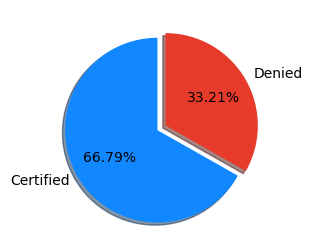

In [50]:
# Assuming you have a DataFrame named df
percentage = df.case_status.value_counts(normalize=True) * 100
labels = ["Certified", "Denied"]

# Plot PieChart with Matplotlib
fig, ax = plt.subplots(figsize=(8, 3))
explode = (0.1, 0)  # explode the first slice (Certified)
colors = ['#1188ff', '#e63a2a']

ax.pie(percentage, labels=labels, startangle=90, 
       autopct='%1.2f%%', explode=explode, shadow=True, colors=colors)
plt.show()

A little imabalanced data

In [52]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### 1. Does applicant (continent) has any impact on visa status (case_status) 

In [54]:
# Group data by continent and their count of case_status
continent_case_status = df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame() * 100
continent_case_status


proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

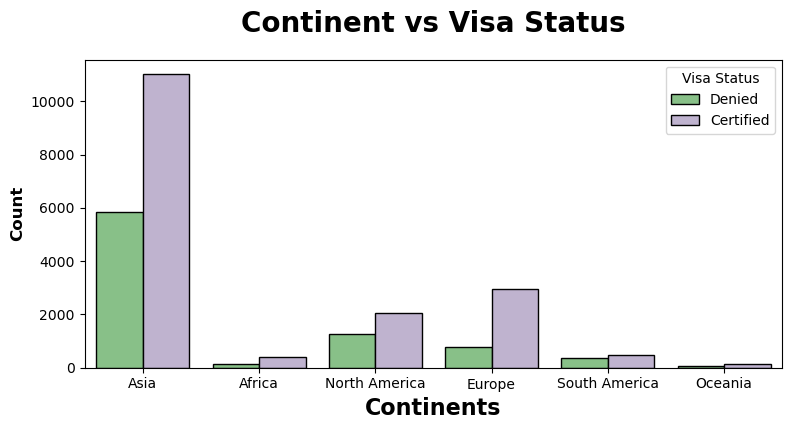

In [55]:
plt.subplots(figsize=(9, 4))  # Set the figure size
sns.countplot(x="continent", hue="case_status", data=df, ec="black", palette="Accent")  # Create count plot
plt.title("Continent vs Visa Status", weight="bold", fontsize=20, pad=20)  # Set title
plt.ylabel("Count", weight="bold", fontsize=12)  # Set y-axis label
plt.xlabel("Continents", weight="bold", fontsize=16)  # Set x-axis label
plt.legend(title="Visa Status", fancybox=True)  # Add legend
plt.show()  # Show the plot


In [56]:
df2 = df.copy()
df2

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings


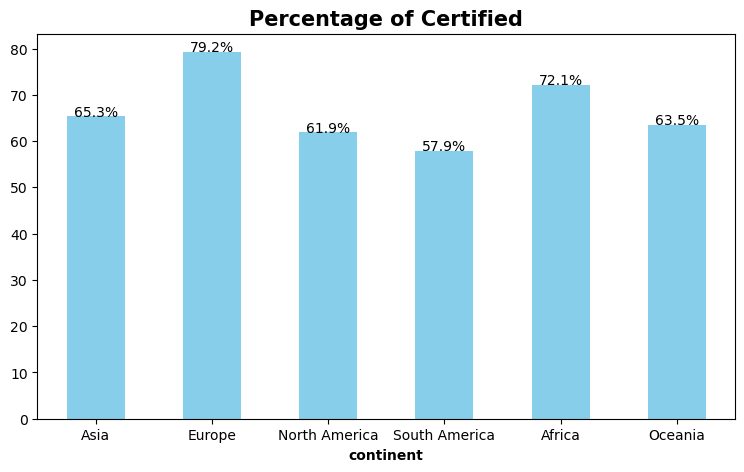

In [58]:
plt.figure(figsize=(9, 5))  # Set the figure size

# Calculate percentage of certified applications by continent
(100*df2[df2['case_status'].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts()).plot(
    kind='bar', stacked=True, color='skyblue'
)

plt.title("Percentage of Certified", fontsize=15, fontweight='bold')  # Set title

# Calculate order for the labels
order1 = (100*df2[df2['case_status'].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())

# Add text annotations to the bars
for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:.1f}%'.format(count)
    plt.text(n, count + 0.1, strt, ha='center')  # Position the text above the bars

plt.xlabel('continent', fontweight='bold')  # Set x-axis label
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()  # Show the plot


### 2.Does applicant education has any impact on Visa Status (visa_status)

In [60]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [61]:
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame() * 100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

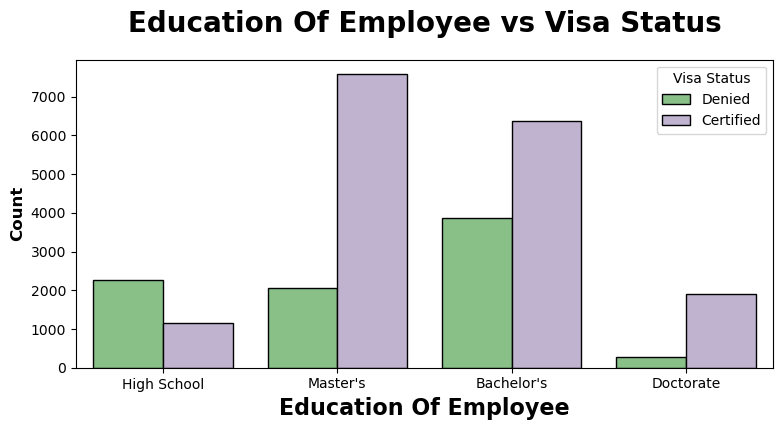

In [62]:
plt.subplots(figsize=(9, 4))  # Set the figure size
sns.countplot(x="education_of_employee", hue="case_status", data=df, ec="black", palette="Accent")  # Create count plot
plt.title("Education Of Employee vs Visa Status", weight="bold", fontsize=20, pad=20)  # Set title
plt.ylabel("Count", weight="bold", fontsize=12)  # Set y-axis label
plt.xlabel("Education Of Employee", weight="bold", fontsize=16)  # Set x-axis label
plt.legend(title="Visa Status", fancybox=True)  # Add legend
plt.show()  # Show the plot

**Percentages vs. Counts**: The percentages you're seeing for the Doctorate (e.g., 87.22% certified) are based on the total number of Doctorate applicants. So if there are very few Doctorate applicants compared to Bachelor’s or Master’s applicants, even a high percentage can correspond to a small absolute number of certified applications.

**Total Applicants**: For example, if there are only 100 Doctorate applications, and 87 of those are certified, then the percentage is high (87.22%), but that represents a smaller count than, say, 7,000 Bachelor’s applications, where even a lower percentage may result in a higher absolute number of certified applications.

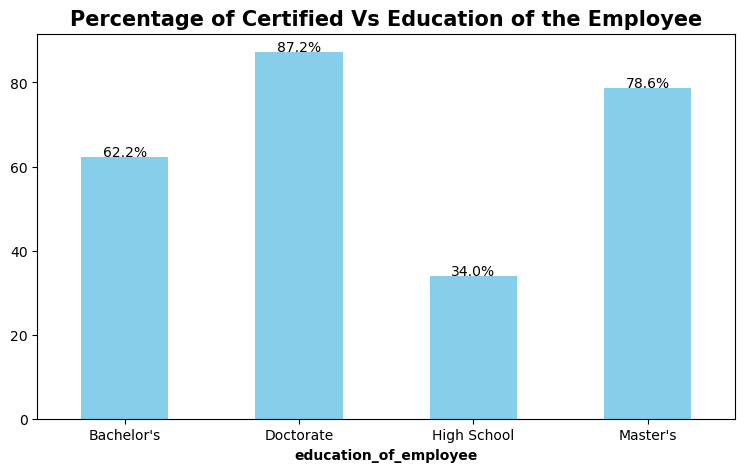

In [64]:
plt.figure(figsize=(9, 5))  # Set the figure size

# Calculate percentage of certified applications by education
(100*df2[df2['case_status'].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts()).plot(
    kind='bar', stacked=True, color='skyblue'
)

plt.title("Percentage of Certified Vs Education of the Employee", fontsize=15, fontweight='bold')  # Set title

# Calculate order for the labels
order1 = (100*df2[df2['case_status'].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts())

# Add text annotations to the bars
for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:.1f}%'.format(count)
    plt.text(n, count + 0.1, strt, ha='center')  # Position the text above the bars

plt.xlabel('education_of_employee', fontweight='bold')  # Set x-axis label
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()  # Show the plot


From this analysis, it is evident that applicant education has a significant impact on the target variable (visa_status). Higher educational qualifications correlate with higher certification rates, indicating that applicants with advanced degrees (Master's and Doctorate) are more likely to have their visa applications certified compared to those with lower educational qualifications (such as High School). This trend suggests that education may be an important factor influencing visa approval, potentially reflecting the demand for higher-skilled labor in the job market.

In [66]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

### 3.Does applicant's previous work experience has any impact on Visa Status(case_status)

In [68]:
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame() * 100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

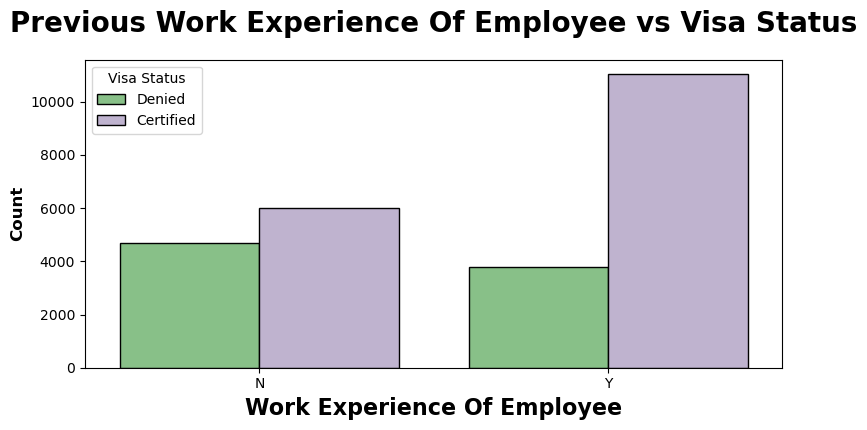

In [69]:
plt.subplots(figsize=(9, 4))  # Set the figure size
sns.countplot(x="has_job_experience", hue="case_status", data=df, ec="black", palette="Accent")  # Create count plot
plt.title("Previous Work Experience Of Employee vs Visa Status", weight="bold", fontsize=20, pad=20)  # Set title
plt.ylabel("Count", weight="bold", fontsize=12)  # Set y-axis label
plt.xlabel("Work Experience Of Employee", weight="bold", fontsize=16)  # Set x-axis label
plt.legend(title="Visa Status", fancybox=True)  # Add legend
plt.show()  # Show the plot

**Count of Certified vs. Denied Applications:**
Applicants with prior work experience (Y) have a significantly higher count of certified applications, indicated by the larger purple bar. This suggests that having prior work experience is positively correlated with visa certification.
Conversely, applicants without prior work experience (N) show a noticeably smaller number of certified applications, indicated by the smaller purple bar, while the denied applications are higher than those with work experience.

**Impact of Previous Work Experience:**
The visual representation indicates a clear impact of previous work experience on the visa application outcome. Specifically, applicants with prior work experience are more likely to have their applications certified, while those without experience tend to have a higher count of denied applications.

**Implications for Applicants:**
This data suggests that prior work experience may enhance an applicant's chances of securing a visa. For potential applicants, it is advisable to seek relevant job experiences to improve their application outcomes.
Conclusion:

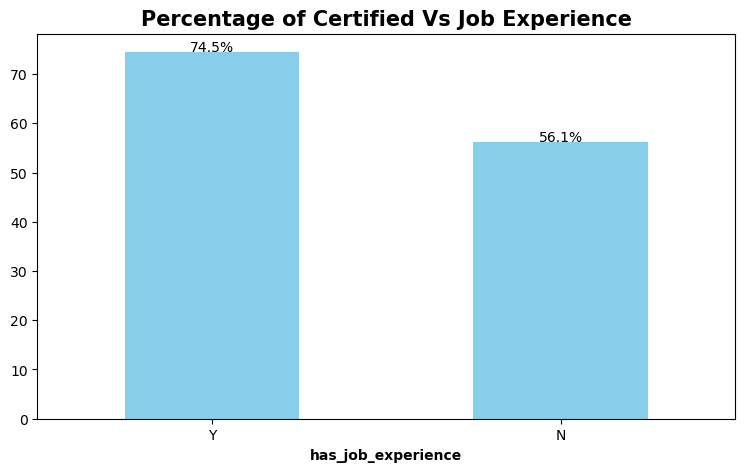

In [71]:
plt.figure(figsize=(9, 5))  # Set the figure size

# Calculate percentage of certified applications by education
(100*df2[df2['case_status'].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(
    kind='bar', stacked=True, color='skyblue'
)

plt.title("Percentage of Certified Vs Job Experience", fontsize=15, fontweight='bold')  # Set title

# Calculate order for the labels
order1 = (100*df2[df2['case_status'].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())

# Add text annotations to the bars
for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:.1f}%'.format(count)
    plt.text(n, count + 0.1, strt, ha='center')  # Position the text above the bars

plt.xlabel('has_job_experience', fontweight='bold')  # Set x-axis label
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()  # Show the plot


**Applicants with Work Experience (Y):** Approximately 74.5% of those who had previous work experience were granted visa certification. This indicates a strong positive correlation between having work experience and the likelihood of obtaining a certified visa.

**Applicants without Work Experience (N):** In contrast, only 56.1% of applicants without prior work experience received certification. This demonstrates a significant decrease in the approval rate compared to their experienced counterparts.

### 4. If the employee requires job training , does it make any impact on Visa Status ?

In [74]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [75]:
# Group data by requires_job_training and their count of case_status
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame() * 100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

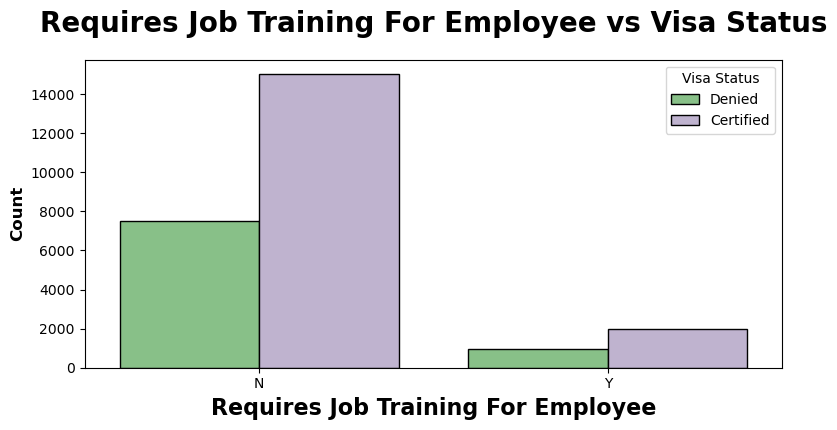

In [76]:
plt.subplots(figsize=(9, 4))  # Set the figure size
sns.countplot(x="requires_job_training", hue="case_status", data=df, ec="black", palette="Accent")  # Create count plot
plt.title("Requires Job Training For Employee vs Visa Status", weight="bold", fontsize=20, pad=20)  # Set title
plt.ylabel("Count", weight="bold", fontsize=12)  # Set y-axis label
plt.xlabel("Requires Job Training For Employee", weight="bold", fontsize=16)  # Set x-axis label
plt.legend(title="Visa Status", fancybox=True)  # Add legend
plt.show()  # Show the plot

The data indicates that requiring job training seems to correlate with a lower overall number of applications, which can affect the visibility of the certification rate for this group. While a higher percentage of certified applications may exist among those needing training, the low volume limits its impact on overall visa status trends.
Conversely, applicants not requiring job training have a clearer trend towards certification, suggesting that it may be advantageous for applicants to have existing qualifications or experience that negate the need for additional training.

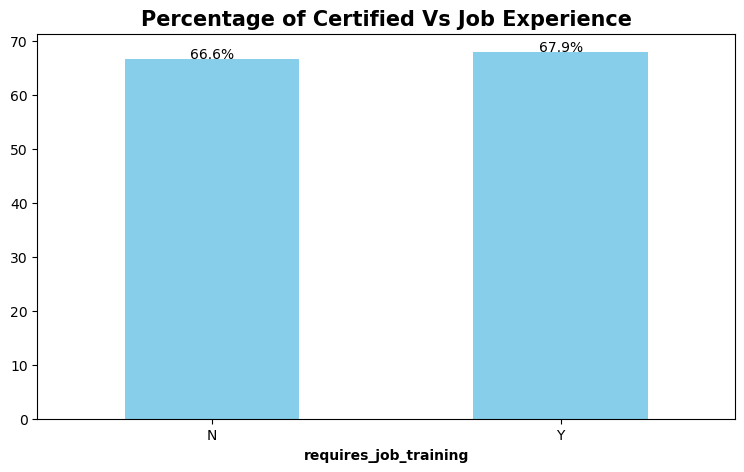

In [78]:
plt.figure(figsize=(9, 5))  # Set the figure size

# Calculate percentage of certified applications by education
(100*df2[df2['case_status'].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(
    kind='bar', stacked=True, color='skyblue'
)

plt.title("Percentage of Certified Vs Job Experience", fontsize=15, fontweight='bold')  # Set title

# Calculate order for the labels
order1 = (100*df2[df2['case_status'].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())

# Add text annotations to the bars
for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:.1f}%'.format(count)
    plt.text(n, count + 0.1, strt, ha='center')  # Position the text above the bars

plt.xlabel('requires_job_training', fontweight='bold')  # Set x-axis label
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()  # Show the plot


**Implication of Job Training:** The similarity in percentages suggests that requiring job training does not significantly hinder the chances of certification. This could imply that the skills or qualifications gained through job training are recognized in the certification process, possibly due to employers valuing relevant experience regardless of formal job training.

**Potential Influence of Educational Background:** As you suggested, the education level of applicants could be a contributing factor. If a significant number of applicants have strong educational qualifications (e.g., degrees like Bachelor's, Master's, or Doctorate), this may lead to higher certification rates across both groups. Therefore, even those without job training might have solid educational credentials, resulting in similar certification percentages.

**Additional Factors:** It's important to consider that other factors may also influence these outcomes, such as the specific industries or job roles the applicants are targeting. The demands of the job market, along with the skills and qualifications typically associated with success in obtaining certifications, can play a role in the certification rates.

### 5. Does no. of employees of employer has any effect on Visa Status ?

In [81]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [82]:
df['no_of_employees'].value_counts()

no_of_employees
183      18
854      16
724      16
766      15
1476     15
         ..
5876      1
5536      1
47866     1
4700      1
40224     1
Name: count, Length: 7105, dtype: int64

In [83]:
# Group data by no_of_employees and their count of case_status
df.groupby('no_of_employees')['case_status'].value_counts(normalize=True).to_frame() * 100

proportion
no_of_employees case_status            
-26             Certified     57.142857
                Denied        42.857143
-25             Certified     80.000000
                Denied        20.000000
-17             Certified     50.000000
...                                 ...
 547172         Certified    100.000000
 579004         Certified    100.000000
 581468         Certified    100.000000
 594472         Denied       100.000000
 602069         Certified    100.000000

[10689 rows x 1 columns]

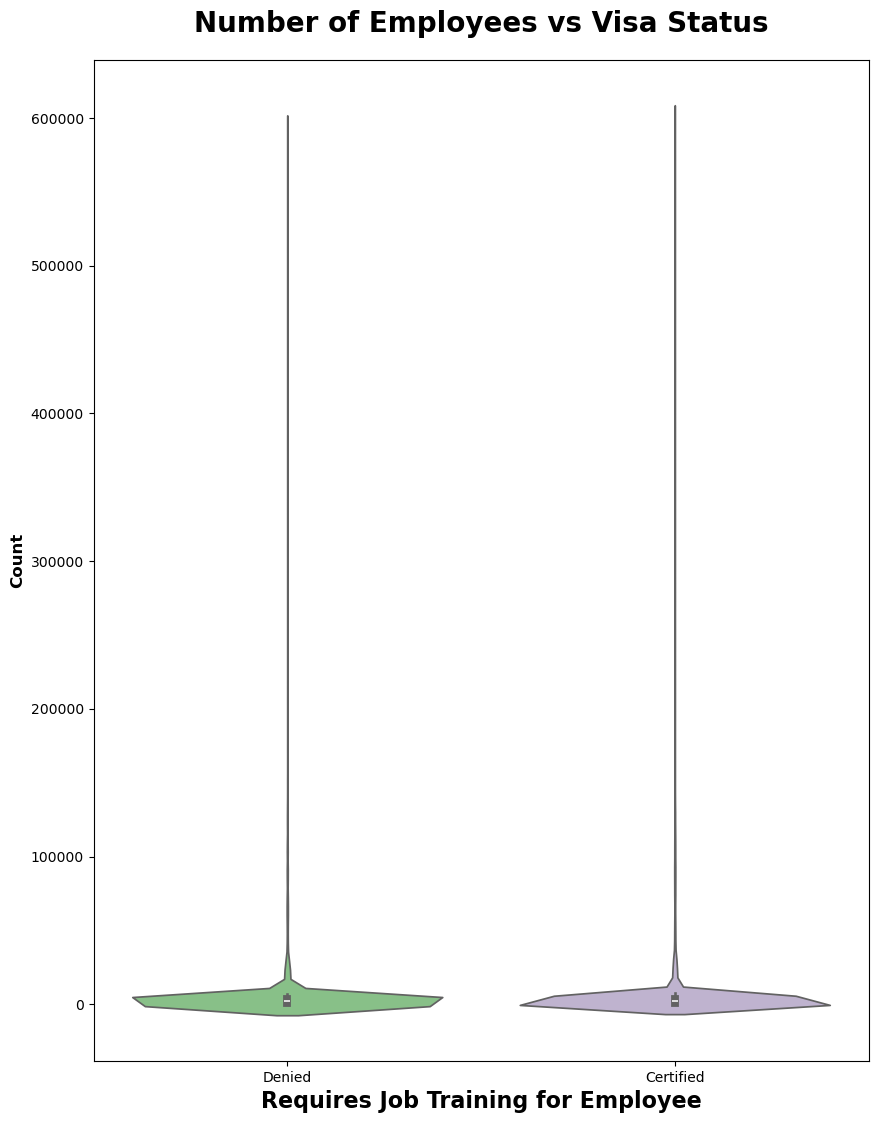

In [84]:
# Set up the figure size
plt.subplots(figsize=(10, 13))

# Create a violin plot
sns.violinplot(x='case_status', y='no_of_employees', data=df, palette='Accent')

# Set the title and labels
plt.title("Number of Employees vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)

# Show the y-axis limits
plt.ylim()

# Display the plot
plt.show()

**Violin Plot:** The plot shows that the distribution of the number of employees for both visa statuses (Certified and Denied) has a significant spread. The shape of the violin indicates that there are many instances where the number of employees is quite high, which suggests the presence of outliers.

**Box Plot:** The box plot reveals similar insights, where the whiskers extend considerably, indicating a wider range of employee counts. The presence of individual points beyond the whiskers suggests that there are outliers in the dataset, particularly for both Certified and Denied statuses.

**We have to handle the outliers in further analysis**


In [86]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

### 6. Wages(unit_of_wage) and its impact on Visa Status

In [88]:
# Group data by unit_of_wage and their count of case_status
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True).to_frame() * 100

proportion
unit_of_wage case_status            
Hour         Denied        65.368567
             Certified     34.631433
Month        Certified     61.797753
             Denied        38.202247
Week         Certified     62.132353
             Denied        37.867647
Year         Certified     69.885027
             Denied        30.114973

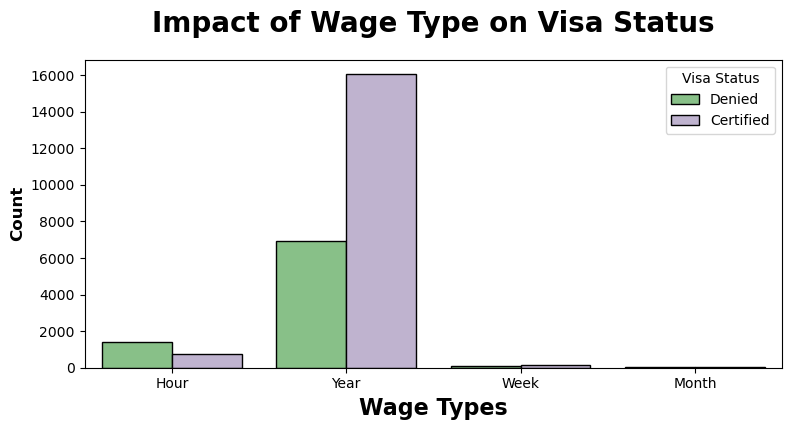

In [89]:
plt.subplots(figsize=(9, 4))  # Set the figure size
sns.countplot(x="unit_of_wage", hue="case_status", data=df, ec="black", palette="Accent")  # Create count plot
plt.title("Impact of Wage Type on Visa Status", weight="bold", fontsize=20, pad=20)  # Set title
plt.ylabel("Count", weight="bold", fontsize=12)  # Set y-axis label
plt.xlabel("Wage Types", weight="bold", fontsize=16)  # Set x-axis label
plt.legend(title="Visa Status", fancybox=True)  # Add legend
plt.show()  # Show the plot

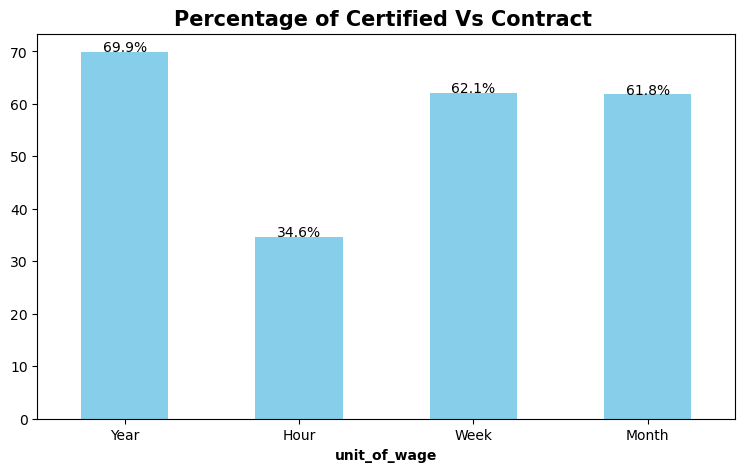

In [90]:
plt.figure(figsize=(9, 5))  # Set the figure size

# Calculate percentage of certified applications by education
(100*df2[df2['case_status'].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(
    kind='bar', stacked=True, color='skyblue'
)

plt.title("Percentage of Certified Vs Contract ", fontsize=15, fontweight='bold')  # Set title

# Calculate order for the labels
order1 = (100*df2[df2['case_status'].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())

# Add text annotations to the bars
for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:.1f}%'.format(count)
    plt.text(n, count + 0.1, strt, ha='center')  # Position the text above the bars

plt.xlabel('unit_of_wage', fontweight='bold')  # Set x-axis label
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()  # Show the plot


**Trend Analysis:** The data implies a trend where longer-term wage agreements (e.g., annual contracts) are associated with higher visa approval rates. This could be due to employers demonstrating a stronger commitment to the applicant, which might positively influence the visa adjudication process.

**Highest Certification Rate for Yearly Wage:** The highest percentage of certified applications is associated with the "Year" wage type, at 69.9%. This suggests that applicants receiving an annual salary may have a higher likelihood of visa approval compared to those paid hourly or weekly.

**Lower Certification for Hourly Wage:** The hourly wage category shows a significantly lower certification rate of 34.6%. This indicates that applicants with hourly wages may face more challenges in obtaining visa approval, potentially due to employer-related concerns or the nature of the jobs associated with hourly wages.

The graph suggests a clear correlation between the unit of wage and the likelihood of visa status approval, highlighting the importance of wage structure in the visa application process. The data indicates that potential applicants might benefit from seeking annual contracts to improve their chances of certification.


### 7. Does region of employment has impact on Visa Status?

In [93]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [94]:
# Group data by region_of_employment and their count of case_status
df.groupby('region_of_employment')['case_status'].value_counts(normalize=True).to_frame() * 100

proportion
region_of_employment case_status            
Island               Certified     60.266667
                     Denied        39.733333
Midwest              Certified     75.528210
                     Denied        24.471790
Northeast            Certified     62.904795
                     Denied        37.095205
South                Certified     70.015676
                     Denied        29.984324
West                 Certified     62.253265
                     Denied        37.746735

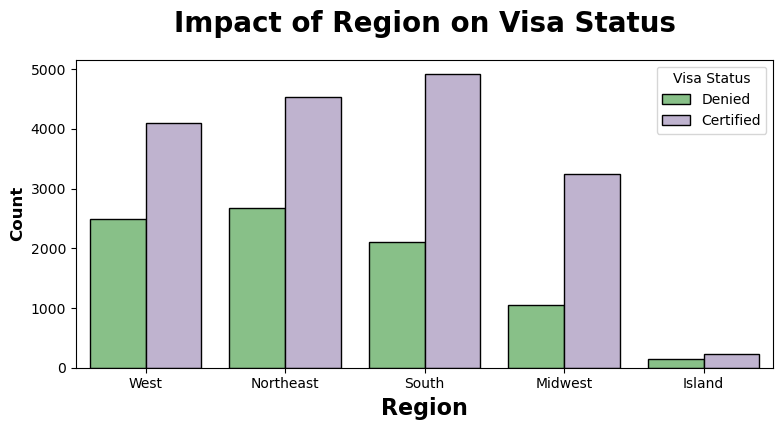

In [95]:
plt.subplots(figsize=(9, 4))  # Set the figure size
sns.countplot(x="region_of_employment", hue="case_status", data=df, ec="black", palette="Accent")  # Create count plot
plt.title("Impact of Region on Visa Status", weight="bold", fontsize=20, pad=20)  # Set title
plt.ylabel("Count", weight="bold", fontsize=12)  # Set y-axis label
plt.xlabel("Region", weight="bold", fontsize=16)  # Set x-axis label
plt.legend(title="Visa Status", fancybox=True)  # Add legend
plt.show()  # Show the plot

**Regional Variations in Approval Rates:** The South region has the highest count of certified applications, indicating a strong performance in securing visa approvals in that area. This could reflect a robust job market or effective employer practices in meeting visa application requirements.

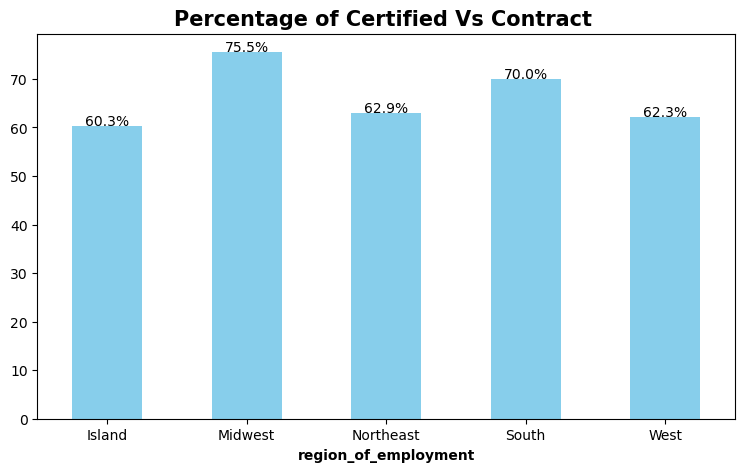

In [97]:
plt.figure(figsize=(9, 5))  # Set the figure size

# Calculate percentage of certified applications by education
(100*df2[df2['case_status'].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts()).plot(
    kind='bar', stacked=True, color='skyblue'
)

plt.title("Percentage of Certified Vs Contract ", fontsize=15, fontweight='bold')  # Set title

# Calculate order for the labels
order1 = (100*df2[df2['case_status'].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts())

# Add text annotations to the bars
for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:.1f}%'.format(count)
    plt.text(n, count + 0.1, strt, ha='center')  # Position the text above the bars

plt.xlabel('region_of_employment', fontweight='bold')  # Set x-axis label
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()  # Show the plot


**Count vs. Proportion:**

In the count plot it shows the absolute number of applicants for each visa status (Denied and Certified) in each region. The Midwest appears smaller in the count of Denied applicants compared to other regions, which makes it look less significant in that context.

The second bar graph presents the percentage of Certified applicants relative to the total number of applicants in each region, which is why Midwest shows a higher percentage of Certified applicants (75.5%). This indicates that while the total number might not be the highest in absolute terms, the ratio of certified applications is substantial when compared to the total applications from that region.

In [99]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

### 8. Does prevailing_wage has any impact on Visa Status?

In [101]:
df['prevailing_wage']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [102]:
# Group data by prevailing_wage and their count of case_status
df.groupby('prevailing_wage').case_status.value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

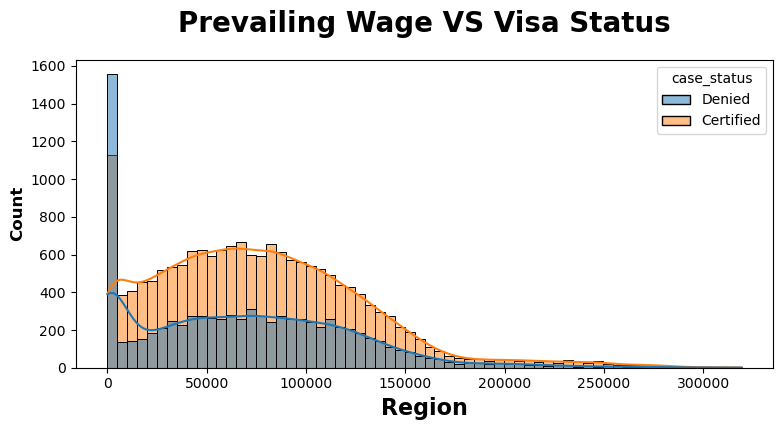

In [103]:
plt.subplots(figsize=(9, 4))  # Set the figure size
sns.histplot(x="prevailing_wage", hue="case_status", data=df, kde=True)  # Create count plot
plt.title("Prevailing Wage VS Visa Status", weight="bold", fontsize=20, pad=20)  # Set title
plt.ylabel("Count", weight="bold", fontsize=12)  # Set y-axis label
plt.xlabel("Region", weight="bold", fontsize=16)  # Set x-axis label
#plt.legend(title="Visa Status", fancybox=True)  # Add legend
plt.show()  # Show the plot

**Comparison of Certification and Denial:**
The histogram indicates that for lower prevailing wages, the count of denied applications (shown in blue) is significantly higher than certified applications (shown in orange). This suggests that lower wages may be associated with a higher likelihood of visa denial.

**Gradual Increase with Higher Wages:**
As the prevailing wage increases (from 50,000 to around 100,000), the trend shifts, with the number of certified applications gradually increasing. This trend indicates that higher wages are correlated with a higher likelihood of visa approval.

### 9. Prevailing Wage based on Education

In [106]:
print('Average Prevailing wage based on Employee education')
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage', ascending=False)



Average Prevailing wage based on Employee education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


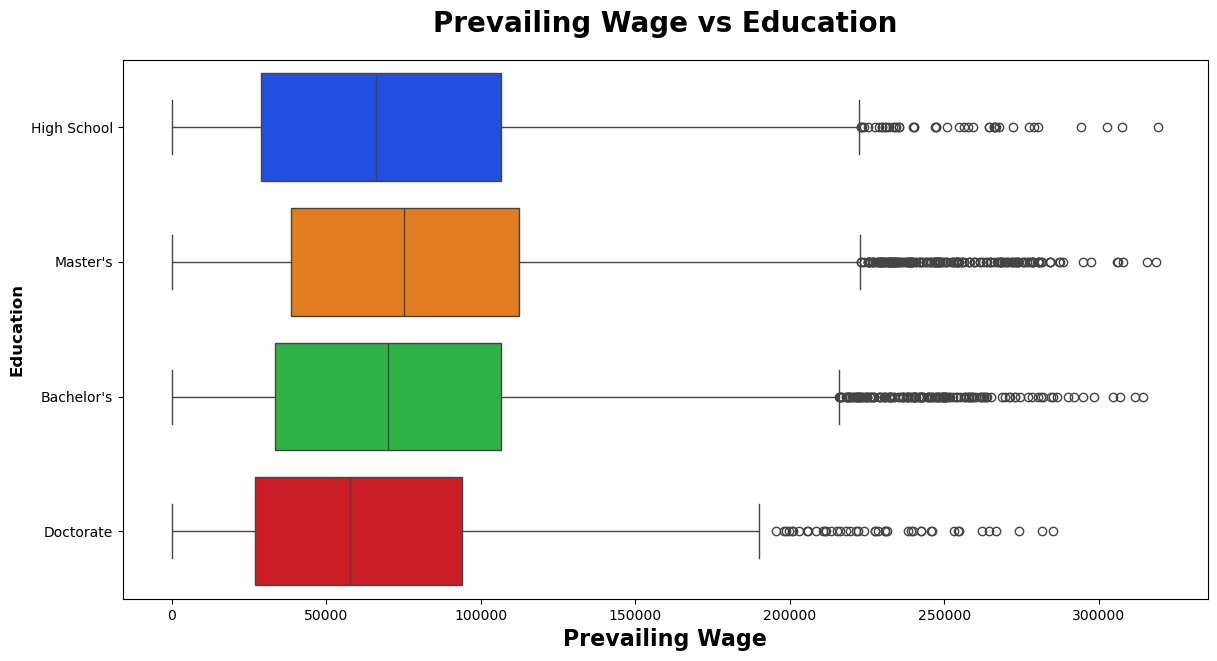

In [107]:
plt.subplots(figsize=(14, 7))  # Set the figure size
sns.boxplot(y="education_of_employee", x="prevailing_wage", data=df, palette='bright')  # Create boxplot
plt.title("Prevailing Wage vs Education", weight="bold", fontsize=20, pad=20)  # Set title
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)  # Set x-axis label
plt.ylabel("Education", weight="bold", fontsize=12)  # Set y-axis label
plt.show()  # Show the plot


**Median Wages by Education Level:**
Master's Degree Holders have the highest median prevailing wage compared to other education levels.
Doctorate Holders also show high median wages, but they have a wider interquartile range, indicating more variability in wages.
Bachelor's Degree Holders and High School Graduates have lower median wages than Master's and Doctorate holders, with the latter showing the lowest median.

**Spread of Wages:**
The interquartile ranges (IQR) for Master's and Doctorate are relatively large, indicating that there is considerable variation in the prevailing wages within these groups.
The High School category shows a narrower range, suggesting that wages are more consistent among individuals with only a high school education.

Outliers:
The boxplot shows a number of outliers for all educational categories, particularly among those with a Master's degree and Doctorate. This indicates that while most individuals fall within a certain wage range, there are some who earn significantly more than the typical wage for their education level.

**Overall Trend:**
The overall trend suggests that higher educational attainment is associated with higher prevailing wages. This aligns with common labor market expectations where education correlates positively with income.

### 10. Prevailing Wage based on Experience

In [110]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [111]:
print('Median Prevailing wage based on Job Experience')
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage', ascending=False)



Median Prevailing wage based on Job Experience


,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


**Nature of Job Experience:**
The type of job experience matters. If individuals with job experience are in lower-paying roles or industries compared to those without, this could skew the median wages down for experienced workers.
Conversely, if the 'experienced' workers are predominantly in entry-level roles or temporary positions, their median wage could be lower despite their experience.

**Wage Structure in Different Roles:**
It’s possible that the majority of the experienced employees are working in jobs that typically offer lower wages, while those without experience might be in more lucrative roles, potentially due to higher educational qualifications or specific skill sets.
New entrants to the job market may be more willing to accept lower wages for a position, while experienced workers might expect higher salaries, creating a discrepancy.

**Economic Factors:**
External economic conditions, such as a high demand for labor in certain sectors (where inexperienced workers might be getting hired at higher rates), can lead to a situation where less experienced individuals are offered better salaries due to market conditions.
If there’s a surplus of experienced workers in a specific field, the competition could drive wages down.

**Top Education**
Maybe the degree of student is master or doctorate or maybe he came from top tier 1 college (IIT,BITS,MIT) that's why have greater salary

### 11. Prevailing Wage base on Continent

In [114]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [115]:
print('Average Prevailing wage based on Continent')
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage', ascending=False)



Average Prevailing wage based on Continent


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


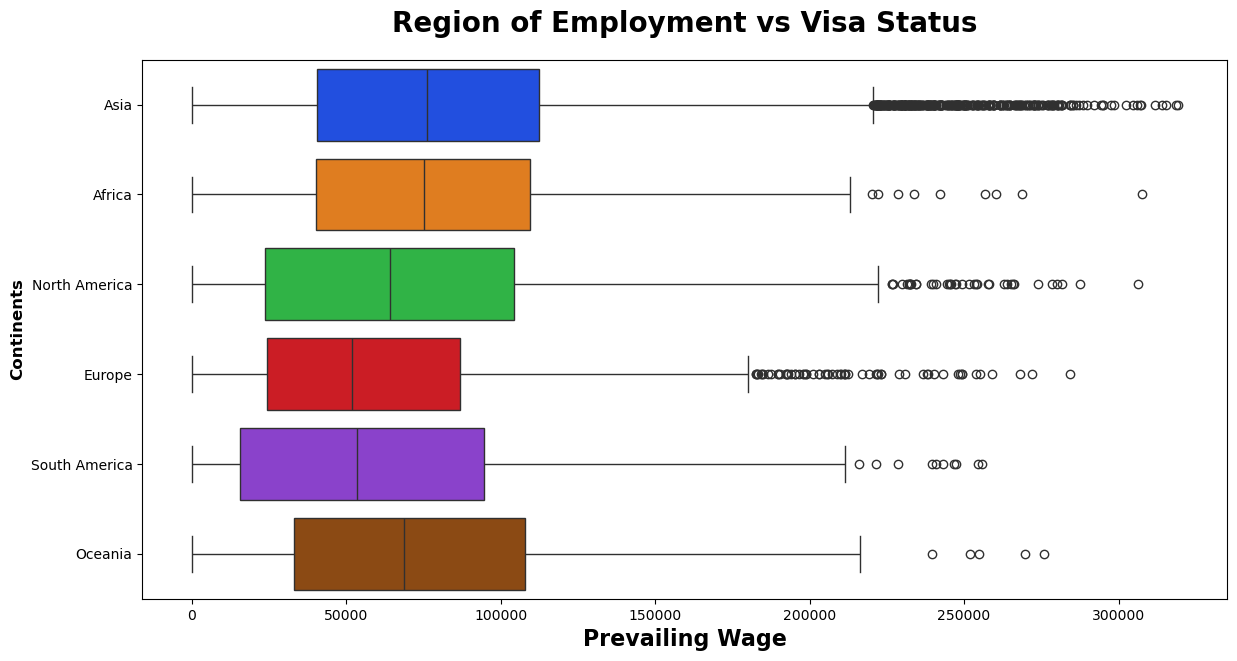

In [116]:
plt.subplots(figsize=(14, 7))  # Set the figure size
sns.boxplot(y="continent", x="prevailing_wage", data=df, palette='bright')  # Create boxplot
plt.title("Region of Employment vs Visa Status", weight="bold", fontsize=20, pad=20)  # Set title
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)  # Set x-axis label
plt.ylabel("Continents", weight="bold", fontsize=12)  # Set y-axis label
plt.show()  # Show the plot

### 12. Year Of Establishment

In [118]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [119]:
print('Average Prevailing wage based on Year Of Estabalishment')
df.groupby('yr_of_estab')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage', ascending=False)

Average Prevailing wage based on Year Of Estabalishment


,prevailing_wage
yr_of_estab,
1810,137747.303333
1843,112478.933353
1800,99893.115625
1852,98230.037132
1848,96281.157917
...,...
1823,44902.271429
1830,42406.688333
1832,37349.212814


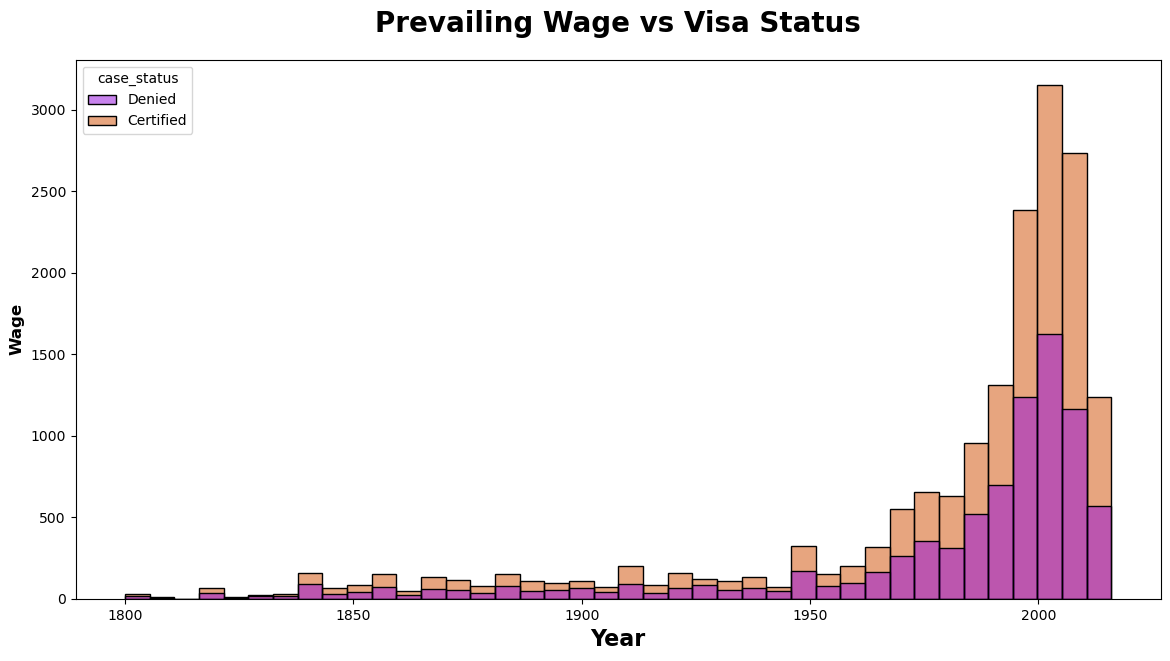

In [199]:
# Set the figure size
plt.subplots(figsize=(14, 7))

# Create a histogram plot
sns.histplot(x="yr_of_estab", data=df, palette='gnuplot', bins=40, hue='case_status')

# Set title and labels
plt.title("Prevailing Wage vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.xlabel("Year", weight="bold", fontsize=16)
plt.ylabel("Wage", weight="bold", fontsize=12)

# Show the plot
plt.show()

**General Insights:**

**Wages over Time:** Older firms generally pay higher wages, which may be due to the longevity and market position of these companies. On the other hand, newer firms have more variable wages, with many concentrated in the lower range.

**Education and Wages:** Education plays a significant role in determining the prevailing wage, with higher educational qualifications correlating to higher wages.

**Regional Differences in Visa Status:** The South shows a much higher success rate for certifications than other regions, and regions like the Island have fewer cases, potentially due to lower demand for workers or fewer applications.

## Final Report:

1. The case_id column can be dropped as it serves as an ID and does not contribute to the analysis.

2. The requires_job_training column can be dropped as it doesn’t have a significant impact on the target variable. This was proven through visualizations and the chi-squared test.

3. The no_of_employees and prevailing_wage columns contain outliers that should be handled appropriately.

4. The continent column has very few unique values with a very small count, which can be grouped into a new category labeled as "others."

5. The target column case_status is imbalanced and will need to be addressed before model building.